<a href="https://colab.research.google.com/github/JonathaVaz/Project_Analise_de_Dados_Visualizacao_Conceitual_Caracteristica_e_Intuitiva/blob/main/Analise_de_Dados_com_Visualizacao_Conceitual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Selecionando as melhores Features, Identificando-as, Visualizando-as, Fazendo as melhores Analises para Esduto do modelo, Conceituando-as (implementado sentido) e 
# Arquivo de Suícidios da Albania com Informações como "geração", "ano", "sex" e outros
# Jonatha Rodrigues Tenorio Vaz
# 25/04/2023

In [1]:
# Realizando o Import das Bibliotecas 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [2]:
# Carregando os Dados no Objeto Pandas DATAFrame

data = pd.read_csv("master.csv.zip")

In [4]:
# Exibindo as 5 primeiras linhas

data.head(15)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [6]:
# Exibindo as ultimas linhas

data.tail(14)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27806,Uzbekistan,2013,female,55-74 years,21,1356298,1.55,Uzbekistan2013,0.672,"57,690,453,461",2150,Boomers
27807,Uzbekistan,2013,female,5-14 years,31,2595000,1.19,Uzbekistan2013,0.672,"57,690,453,461",2150,Generation Z
27808,Uzbekistan,2014,male,35-54 years,519,3421300,15.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27809,Uzbekistan,2014,male,25-34 years,318,2739150,11.61,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials
27810,Uzbekistan,2014,female,15-24 years,347,2992817,11.59,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials
27811,Uzbekistan,2014,male,55-74 years,144,1271111,11.33,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers
27812,Uzbekistan,2014,male,15-24 years,347,3126905,11.10,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials
27813,Uzbekistan,2014,male,75+ years,17,224995,7.56,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27814,Uzbekistan,2014,female,25-34 years,162,2735238,5.92,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X


In [7]:
# Separando os Dados em Features 

X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

(array([1., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ]),
 <BarContainer object of 8 artists>)

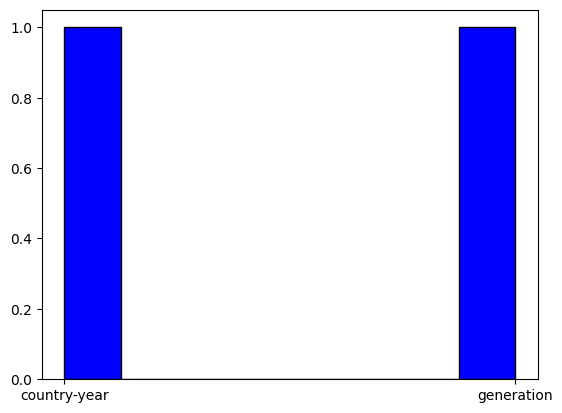

In [187]:
# Usando Matplotlib para desenhar um histograma para  coluna "country-year" e "generation"
plt.hist(['country-year','generation'],bins=8,color='blue', edgecolor='black')

(array([1., 0., 1., 0., 0., 1., 0., 1.]),
 array([0.   , 0.375, 0.75 , 1.125, 1.5  , 1.875, 2.25 , 2.625, 3.   ]),
 <BarContainer object of 8 artists>)

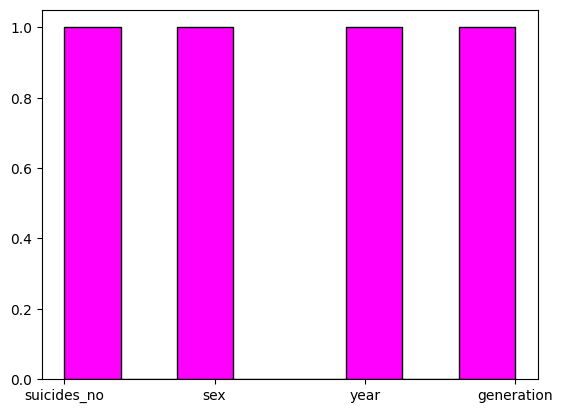

In [133]:
plt.hist(['suicides_no','sex','year','generation'],bins=8,color='magenta', edgecolor='black')

(array([0., 0., 0., 0., 1., 0., 0., 0.]),
 array([-0.5  , -0.375, -0.25 , -0.125,  0.   ,  0.125,  0.25 ,  0.375,
         0.5  ]),
 <BarContainer object of 8 artists>)

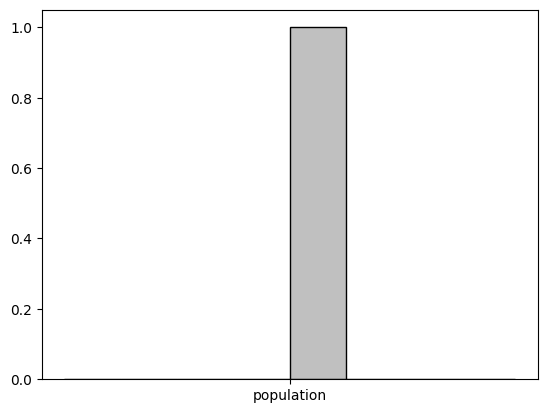

In [189]:
plt.hist(['population'],bins=8,color='silver', edgecolor='black')

<Axes: ylabel='sex'>

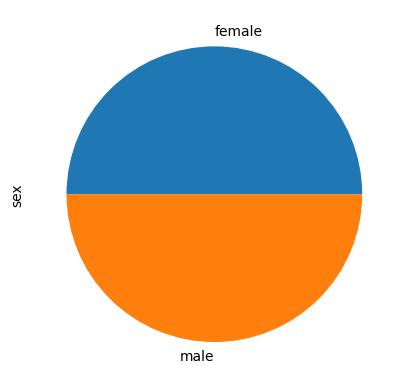

In [192]:
# Criando um grafico de "Pizza"  em sexo e idade das pessoas do titanic
data.groupby(['sex'])['sex'].count().plot(kind='pie')


(array([2.5356e+04, 1.4860e+03, 3.8500e+02, 4.5500e+02, 6.0000e+01,
        2.6000e+01, 1.3000e+01, 3.9000e+01]),
 array([2.7800000e+02, 5.4758950e+06, 1.0951512e+07, 1.6427129e+07,
        2.1902746e+07, 2.7378363e+07, 3.2853980e+07, 3.8329597e+07,
        4.3805214e+07]),
 <BarContainer object of 8 artists>)

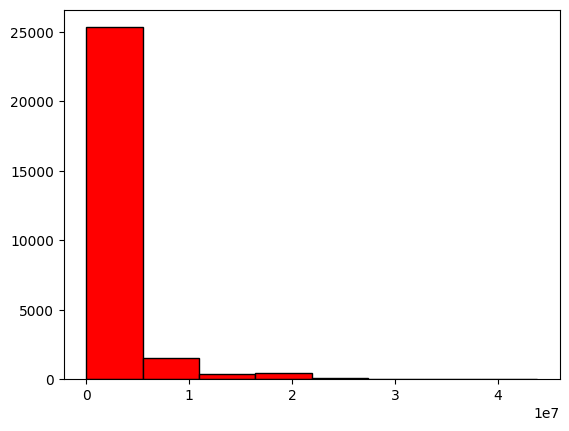

In [137]:
plt.hist(data['population'],bins=8,color='red', edgecolor='black')

(array([6408., 6364.,    0., 2744.,    0., 4990.,    0., 5844., 1470.]),
 array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
        2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ]),
 <BarContainer object of 9 artists>)

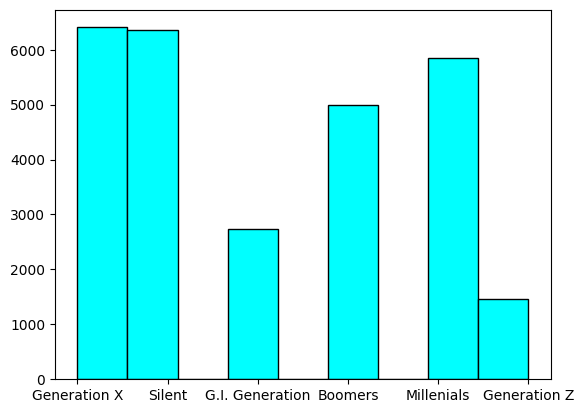

In [132]:
plt.hist(data['generation'],bins=9,color='cyan', edgecolor='black') 

In [30]:
# Criando as labels 

labels = ["Geration X","Silent","G.I Generetion","Boomers","Millenials","Generation Z"]

In [153]:
# Criando lista com cores

cores = ['purple','cyan','silver','magenta','green','orange']

In [154]:
# Criando lista com valores

valores = [6300,6200,2800,5100,6000,1600]

In [155]:
# Definindo raio

raio = 0.6

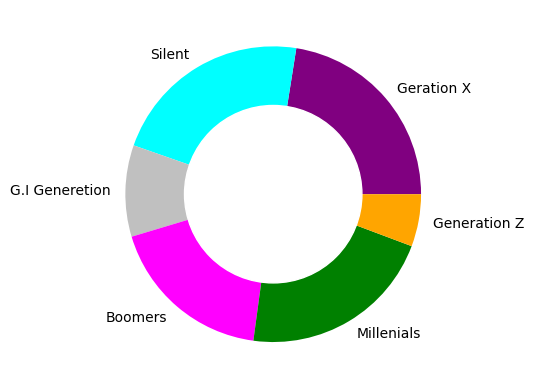

In [156]:
# Criando Gráfico de Barras 

plt.pie(valores,labels=labels,colors=cores)
circulo = plt.Circle((0,0),raio,color='white')
p = plt.gcf()
p.gca().add_artist(circulo)
plt.show()

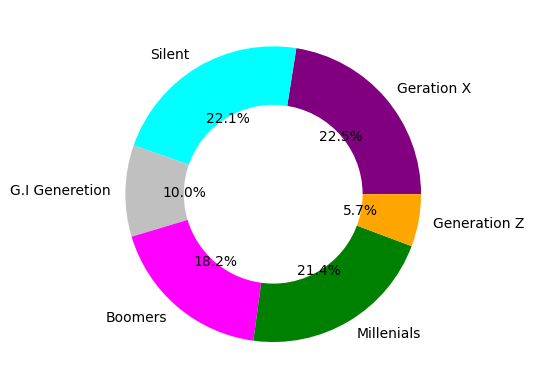

In [157]:
# Adicionando porcentagem 

plt.pie(valores,labels=labels,colors=cores,autopct='%1.1f%%')
circulo = plt.Circle((0,0),raio,color='white')
p = plt.gcf()
p.gca().add_artist(circulo)
plt.show()

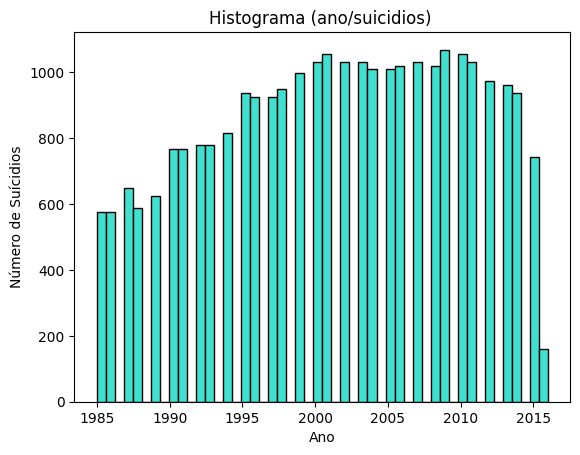

In [70]:
plt.hist(data['year'],bins=50,color='turquoise', edgecolor='black')
plt.xlabel('Ano')
plt.ylabel('Número de Suícidios')
plt.title('Histograma (ano/suicidios) ')
plt.show()

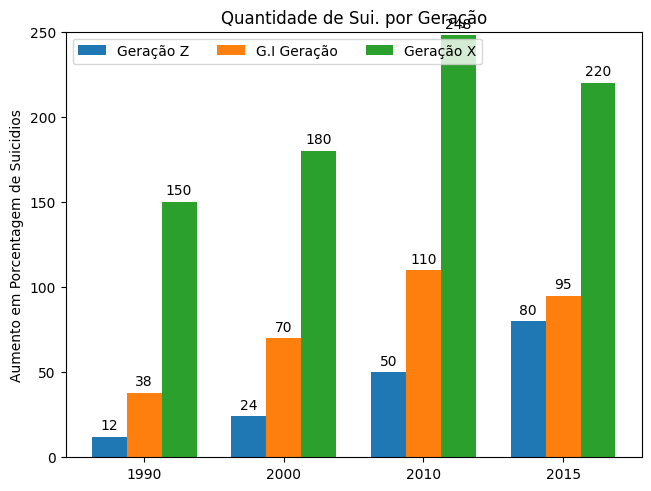

In [171]:
species = ("1990", "2000", "2010", "2015")
penguin_means = {
    'Geração Z': (12, 24, 50, 80),
    'G.I Geração': (38, 70, 110, 95),
    'Geração X': (150, 180, 248, 220),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Aumento em Porcentagem de Suicidios')
ax.set_title('Quantidade de Sui. por Geração')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

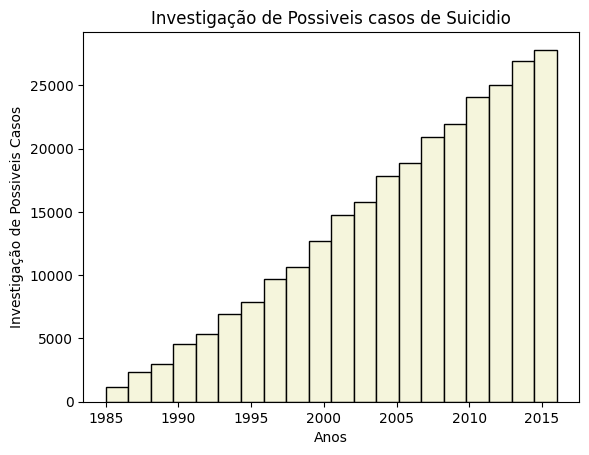

In [176]:
# Criando o Gráfico

plt.hist(data['year'],bins=20,color='beige', edgecolor='black',cumulative=True)
plt.xlabel('Anos')
plt.ylabel('Investigação de Possiveis Casos')
plt.title('Investigação de Possiveis casos de Suicidio')
plt.show()
     

In [170]:
from matplotlib.patches import ConnectionPatch

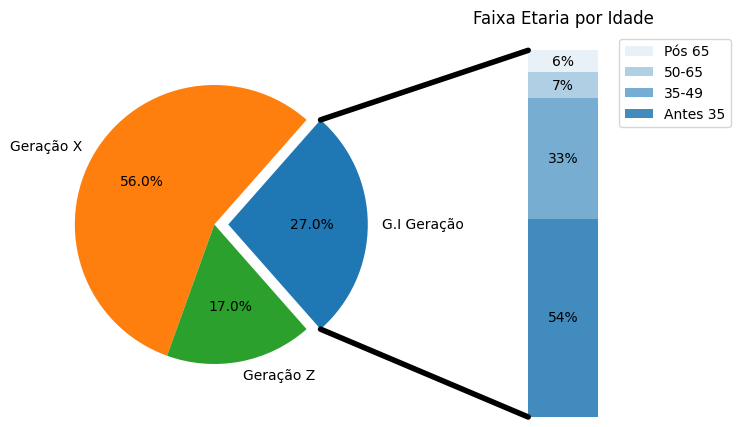

In [194]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [.27, .56, .17]
labels = ['G.I Geração', 'Geração X', 'Geração Z']
explode = [0.1, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.54, .33, .07, .06]
age_labels = ['Antes 35', '35-49', '50-65', 'Pós 65']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Faixa Etaria por Idade')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()